In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from data_processing import *
from report_processing import *


In [2]:
filename="PS2-29\\1-745.1中.csv"
ring_choice="中圈"
data = read_data(filename)
point_per_mm=data.shape[0]/17 # 17mm
mm_per_point=1/point_per_mm

image_center=(17/2*point_per_mm,17/2*point_per_mm)
            # print(image_center)
ring_num=4

        
binary_image = detect_edge(data,threshold=1.0)

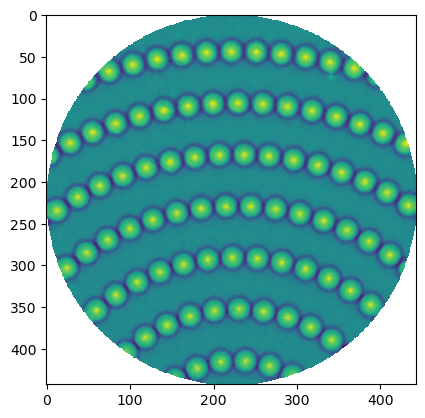

In [3]:
plt.imshow(data)

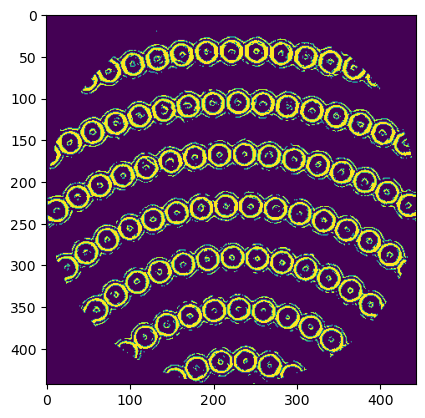

In [4]:
plt.imshow(binary_image)

In [5]:
data = read_data(filename)
point_per_mm=data.shape[0]/17 # 17mm
mm_per_point=1/point_per_mm

if ring_choice == '内圈':
        image_center=(17/2*point_per_mm,17/2*point_per_mm)
        ring_num=4
elif ring_choice == '中圈':
        image_center=((17/2+11)*point_per_mm,17/2*point_per_mm)
        ring_num=14
elif ring_choice == '外圈':
        image_center=((17/2+16)*point_per_mm,17/2*point_per_mm)
        ring_num=14
else:
        pass 
ring_num=4

minRadius=(0.8*point_per_mm/2)
maxRadius=(1.5*point_per_mm/2)  
min_area=3.14*minRadius**2/4
max_area=3.14*maxRadius**2/4   
print(minRadius,maxRadius) 
print(min_area,max_area)  

# binary_image = detect_edge(data,threshold=1.0)
# Apply the function to the binary_image
# microlenses, microlens_only_image = label_microlens_test(
#     binary_image,
#     minRadius,
#     maxRadius
#     )
# microlens_params=microlens_centers_radius(microlenses)
# sorted_microlens_params=cluster_rings(
#         microlens_params,
#         image_center=image_center,
#         ring_num=ring_num,
#         max_ring = ring_num,
#         threshold=10)

binary_image = detect_edge(data,threshold=1.0)
microlenses, microlens_only_image = label_microlens(
binary_image,
min_area=15*15,
)
microlens_params=microlens_centers_radius(microlenses)
sorted_microlens_params=cluster_rings(
        microlens_params,
        image_center=image_center,
        ring_num=ring_num,
        max_ring = ring_num+2,
        threshold=10)

10.423529411764706 19.544117647058822
85.29022283737025 299.84843966262974


c:\Users\goldengrape\miniconda3\envs\cv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


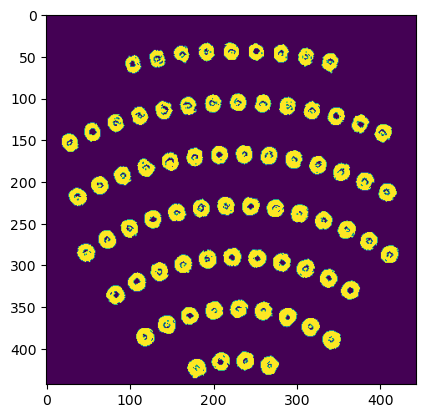

In [6]:
plt.imshow(microlens_only_image)

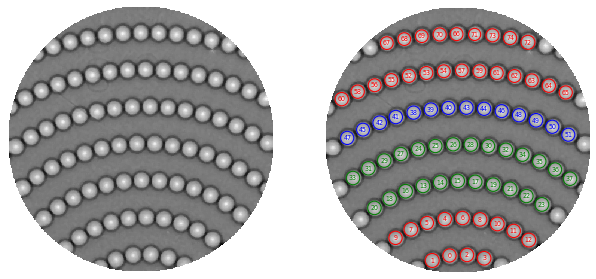

In [7]:
whole_pic_filename=f"{filename.split('.')[0]}_whole.png"
report_whole_picture(sorted_microlens_params, data,whole_pic_filename,dpi=75),
plt.show()

In [8]:
def calculate_each_lens_Rx(data,sorted_microlens_params):
    # 计算每个微透镜周边的基础镜片的屈光度
    # 这样可以用来处理基础镜片为柱镜的情况
    background=data.copy()
    for microlens in sorted_microlens_params:
        center=microlens['center']
        radius=microlens['radius']*1.5
        # 在background中，把center为中心,radius为半径内的数据替换成np.nan
        
        # 创建一个表示半径的二维数组
        y, x = np.ogrid[-center[0]:background.shape[0]-center[0], -center[1]:background.shape[1]-center[1]]
        mask = x*x + y*y <= radius*radius

        # 使用这个数组来更新background
        background[mask] = np.nan
    for microlens in sorted_microlens_params:
        center = microlens['center']
        radius = microlens['radius'] * 3

        # 创建一个表示半径的二维数组
        y, x = np.ogrid[-center[0]:background.shape[0]-center[0], -center[1]:background.shape[1]-center[1]]
        mask = x*x + y*y <= radius*radius

        # 创建一个新的掩码，表示background中哪些值不是np.nan
        not_nan_mask = ~np.isnan(background)

        # 将新的掩码和原来的mask进行逻辑与操作
        final_mask = mask & not_nan_mask

        # 使用这个结果来计算中位数，用中位数比较稳定
        if np.any(final_mask):
            microlens['Rx'] = np.nanmedian(background[final_mask])
        else:
            microlens['Rx'] = np.nan
    return sorted_microlens_params

In [9]:
sorted_microlens_params=calculate_each_lens_Rx(data,sorted_microlens_params)

In [14]:
sorted_microlens_params[20:22]

[{'center': (335.8809509277344, 83.11904907226562),
  'radius': 11.319268226623535,
  'ring': 1,
  'Rx': -3.618274},
 {'center': (304.0, 310.5),
  'radius': 11.543496131896973,
  'ring': 1,
  'Rx': -3.633689}]

In [10]:
for microlens in sorted_microlens_params[20:30]:
    print(microlens['Rx'])

-3.618274
-3.633689
-3.618074
-3.541488
-3.654641
-3.638737
-3.623637
-3.604841
-3.600998
-3.5882125


In [11]:

mean_list=[]
std_list=[]

diameter_list=[0.7,0.5,0.3,0.1]
for d in diameter_list:
    power_list=[]
    maxpower_list=[]
    for i in range(len(sorted_microlens_params)):
        measure_radius=d/2*point_per_mm
        power=measure_one_microlens_center_area(i,sorted_microlens_params,data,radius=measure_radius)

        max_power=measure_one_microlens_max(i,sorted_microlens_params,data,radius=measure_radius)

        power_list.append(power)
        maxpower_list.append(max_power)
        # fig.show()

    mean_power=np.mean(power_list)
    std_power=np.std(power_list)
    max_power_mean=np.mean(maxpower_list)
    max_power_std=np.std(maxpower_list)

    mean_list.append(mean_power)
    std_list.append(std_power)
    print(f"{d}, {mean_power:.3f}, {std_power:.3f}, {max_power_mean:.3f}, {max_power_std:.3f}")

0.7, 1.895, 0.269, 6.202, 0.376
0.5, 2.934, 0.305, 6.202, 0.376
0.3, 4.337, 0.360, 6.202, 0.376
0.1, 5.971, 0.383, 6.198, 0.373


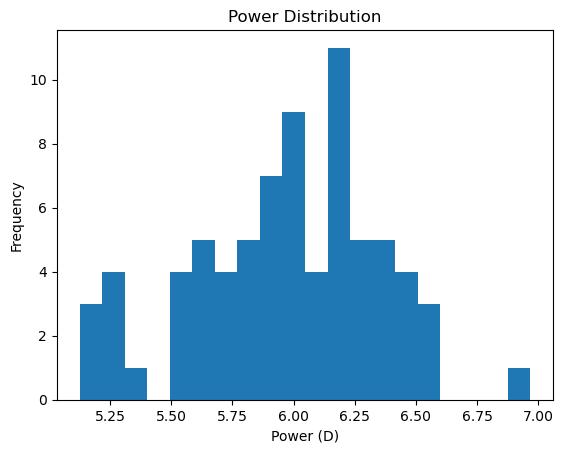

In [12]:
# show power_list histogram
# 同时绘制出连续分布曲线
fig, ax = plt.subplots()
ax.hist(power_list, bins=20)
ax.set_xlabel('Power (D)')
ax.set_ylabel('Frequency')
ax.set_title('Power Distribution')
plt.show()


C:\Users\goldengrape\AppData\Local\Temp\ipykernel_22728\241213352.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(power_list, bins=20, ax=ax, kde=True, color='b')
c:\Users\goldengrape\miniconda3\envs\cv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


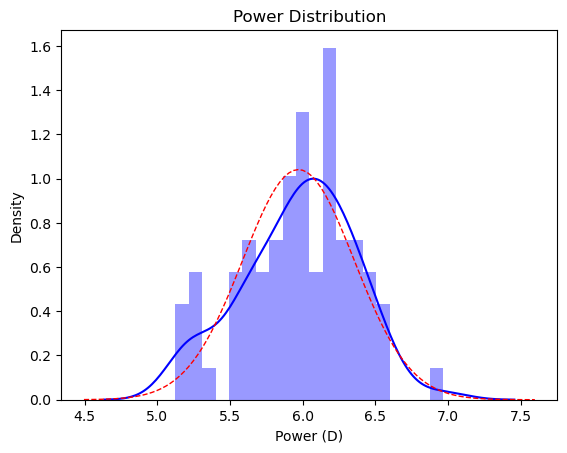

In [13]:
import seaborn as sns
from scipy.stats import norm

# show power_list histogram with KDE
fig, ax = plt.subplots()
sns.distplot(power_list, bins=20, ax=ax, kde=True, color='b')
ax.set_xlabel('Power (D)')
ax.set_ylabel('Density')
ax.set_title('Power Distribution')
# 用虚线画出正态分布曲线，显示出两者的差异
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_power, std_power)
ax.plot(x, p, 'r', linewidth=1, linestyle='--')

plt.show()